### $$ Analystes :\;\;\;\;\;\;\;\;\;\;\; Jeff \; Lwear \; DUVERSEAU \;et \;Lionel \;PETIOTE$$

# Project Title :

# **$$\ Credit\ Card \ Fraud\ Detection\ Using\ Supervised\ Machine\ Learning \ $$**

# 1. Overview

#### Ce projet vise √† concevoir un mod√®le pr√©dictif capable d‚Äôidentifier les transactions frauduleuses effectu√©es par carte de cr√©dit √† l‚Äôaide de techniques d‚Äôapprentissage supervis√©. Le jeu de donn√©es comprend plus d‚Äôun million de transactions issues de cartes authentiques et compromises, chacune contenant un historique d√©taill√©. L‚Äôobjectif est de mettre en place un syst√®me de classification performant permettant de d√©tecter en temps quasi r√©el les anomalies et de r√©duire les pertes financi√®res associ√©es √† la fraude.

#### Ce projet se positionne ainsi comme une √©tape cl√© vers la mise en ≈ìuvre de solutions intelligentes de cybers√©curit√© financi√®re.

## 1.1. Business Understanding

#### La fraude par carte de cr√©dit repr√©sente un d√©fi majeur pour les institutions financi√®res, tant sur le plan √©conomique que r√©putationnel. Elle se caract√©rise par une faible proportion de cas frauduleux et par l‚Äô√©volution constante des m√©thodes de fraude, ce qui complique leur d√©tection. Ce projet s‚Äôinscrit dans une d√©marche d‚Äôaide √† la d√©cision visant √† automatiser la d√©tection de comportements suspects gr√¢ce √† l‚Äôanalyse de donn√©es transactionnelles et √† l‚Äôintelligence artificielle.

#### Dans cette optique, les objectifs ci-dessous ont √©t√© d√©finis pour orienter le processus analytique.

 ## 1.2. Objectifs
 
 ### 1.2.1. Objectif g√©n√©ral
 
#### D√©velopper un mod√®le d‚Äôapprentissage supervis√© capable de pr√©dire avec pr√©cision le caract√®re frauduleux ou non d‚Äôune transaction par carte de cr√©dit √† partir des donn√©es historiques.

### 1.2.2. Objectifs sp√©cifiques

#### Identifier et s√©lectionner les variables les plus discriminantes permettant de diff√©rencier les comportements normaux des comportements suspects.

#### Entra√Æner, tester et comparer plusieurs mod√®les de classification afin de retenir celui offrant la meilleure performance pour la d√©tection de fraude.

## 2. Importations
## 2.1. Importation des biblioth√®ques

In [1]:
# Manipulation des donn√©es
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Gestion des avertissements
import warnings
warnings.filterwarnings('ignore')

# Options d‚Äôaffichage
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

## 2.1. Importation des donn√©es

In [2]:
# Fichiers de cartes authentiques
gdc1 = pd.read_csv("IDXDataset_gdc01.csv")
gdc2 = pd.read_csv("IDXDataset_gdc02.csv")
gdc3 = pd.read_csv("IDXDataset_gdc03.csv")

# Fichier des cartes compromises
wpc = pd.read_csv("IDXDataset_wpc.csv")

# V√©rification rapide
print("Donn√©es import√©es avec succ√®s !")
print(f"gdc1 : {gdc1.shape}")
print(f"gdc2 : {gdc2.shape}")
print(f"gdc3 : {gdc3.shape}")
print(f"wpc  : {wpc.shape}")

Donn√©es import√©es avec succ√®s !
gdc1 : (350000, 8)
gdc2 : (350000, 8)
gdc3 : (348575, 8)
wpc  : (318242, 7)


In [3]:
# Aper√ßu d√©taill√©s des diff√©rents fichiers
print("La structure de la table gdc1 est la suivante :")
gdc1.head()

La structure de la table gdc1 est la suivante :


Unnamed: 0  SEQ Trans_Calendar_Date Local_Transaction_Time CD_TYPE  dollar_amt  CTR  CASE_ID
0           1   41           24-Mar-18               15:54:06     GDC       44.20    1        0
1           2   40           26-Mar-18               11:06:31     GDC       57.78    2        0
2           3   39           27-Mar-18               13:03:02     GDC       37.30    3        0
3           4   38            4-Apr-18               13:35:02     GDC       88.32    4        0
4           5   37            4-Apr-18               18:53:21     GDC       46.74    5        0

In [4]:
# Aper√ßu d√©taill√©s des diff√©rents fichiers
print("La structure de la table gdc2 est la suivante :")
gdc2.head()

La structure de la table gdc2 est la suivante :


Unnamed: 0  SEQ Trans_Calendar_Date Local_Transaction_Time CD_TYPE  dollar_amt     CTR  CASE_ID
0      350001   17           29-May-18               14:08:24     GDC       49.29  350001     8536
1      350002   16            1-Jun-18               11:19:27     GDC       67.67  350002     8536
2      350003   15            6-Jun-18                5:53:43     GDC       57.85  350003     8536
3      350004   14            9-Jun-18                6:37:50     GDC       51.09  350004     8536
4      350005   13           13-Jun-18                5:22:14     GDC       47.16  350005     8536

In [5]:
# Aper√ßu d√©taill√©s des diff√©rents fichiers
print("La structure de la table gdc3 est la suivante :")
gdc3.head()

La structure de la table gdc3 est la suivante :


Unnamed: 0  SEQ Trans_Calendar_Date Local_Transaction_Time CD_TYPE  dollar_amt     CTR  CASE_ID
0      700001   34            7-Dec-17               11:11:10     GDC       34.15  700001    17073
1      700002   33           15-Dec-17               15:48:05     GDC       33.00  700002    17073
2      700003   32           27-Dec-17                9:40:44     GDC       33.48  700003    17073
3      700004   31            5-Jan-18               12:59:46     GDC       35.41  700004    17073
4      700005   30           15-Jan-18               18:23:28     GDC       38.46  700005    17073

In [6]:
# Aper√ßu d√©taill√©s des diff√©rents fichiers
print("La structure de la table wpc est la suivante :")
wpc.head()

La structure de la table wpc est la suivante :


SEQ Trans_Calendar_Date Local_Transaction_Time      CASE_ID  WP_YN CD_TYPE  dollar_amt
0   41           25-Apr-17                6:27:00  176765465.0      0     WPC       57.01
1   40           26-Apr-17               17:07:00  176765465.0      0     WPC       57.81
2   39           28-Apr-17                5:05:00  176765465.0      0     WPC       39.95
3   38            1-May-17                7:43:37  176765465.0      0     WPC       58.18
4   37            2-May-17               15:09:06  176765465.0      0     WPC       58.35

### $Commentaire$

#### Compr√©hension des donn√©es

Les fichiers `gdc1`, `gdc2` et `gdc3` contiennent des transactions l√©gitimes effectu√©es √† partir de **25 575 cartes de cr√©dit**, chacune enregistrant **41 transactions** (soit environ 1 048 575 lignes). Chaque carte est identifi√©e par un `CASE_ID` unique r√©p√©t√© 41 fois, et les transactions sont ordonn√©es selon la s√©quence `SEQ` (de 41 √† 1). Les colonnes `CTR` et `Unnamed:0` ne sont que des identifiants techniques sans utilit√© analytique.

Le fichier `wpc` regroupe **7 762 cartes compromises**, √©galement dot√©es de 41 transactions chacune (‚âà 318 242 lignes). Contrairement aux fichiers GDC, il inclut une colonne `WP_YN` qui pr√©cise la nature de la transaction : **1 pour une transaction frauduleuse (toujours la plus r√©cente, SEQ=1)** et 0 sinon. L‚Äôordre de ses colonnes diff√®re l√©g√®rement, mais la structure reste compatible.

## Fusion des fichiers `gdc1`, `gdc2` et `gdc3`
Les fichiers `gdc1`, `gdc2` et `gdc3` pr√©sentent la m√™me structure et peuvent du coup se fusionner sans difficult√©.

In [7]:
# Fusion initiale
Data_card = pd.concat([gdc1, gdc2, gdc3], ignore_index=True)
Data_card.shape

(1048575, 8)

## Suppression des colonnes Unnamed.0 et CTR
Les colonnes Unnamed.0 et CTR donnent la m√™me information, il s'agit d'un indentifiant de transaction et du coup ne pr√©sentent pas de r√©elle utilit√© analytique. Donc, on peut se permettre de les supprimer.

In [8]:
# Suppression des colonnes Unnamed:0 et CTR
Data_card = Data_card.drop(['Unnamed: 0', 'CTR'], axis=1)

In [9]:
# Comparer les colonnes entre les DataFrames
print("Colonnes gdc1:", set(Data_card.columns))
print("Colonnes wpc :", set(wpc.columns))

# Colonnes manquantes ou diff√©rentes
print("\nColonnes manquantes dans wpc :", set(Data_card.columns) - set(wpc.columns))
print("Colonnes suppl√©mentaires dans wpc :", set(wpc.columns) - set(Data_card.columns))

Colonnes gdc1: {'Local_Transaction_Time', 'CASE_ID', 'CD_TYPE', 'SEQ', 'Trans_Calendar_Date', 'dollar_amt'}
Colonnes wpc : {'Local_Transaction_Time', 'CASE_ID', 'WP_YN', 'CD_TYPE', 'SEQ', 'Trans_Calendar_Date', 'dollar_amt'}

Colonnes manquantes dans wpc : set()
Colonnes suppl√©mentaires dans wpc : {'WP_YN'}


In [10]:
# Harmoniser les colonnes
common_cols = [col for col in Data_card.columns if col in wpc.columns]
wpc = wpc[common_cols + ['WP_YN']] if 'WP_YN' in wpc.columns else wpc[common_cols]

# Cr√©ation de la variable cible 'fraude'
wpc['fraude'] = wpc['WP_YN'].apply(lambda x: 1 if x == 1 else 0)
Data_card['fraude'] = 0

# Supprimer la colonne WP_YN
wpc_clean = wpc.drop(columns=['WP_YN'], errors='ignore')

# Fusion globale
Data_card_complete = pd.concat([Data_card, wpc_clean], ignore_index=True)

# V√©rifications de coh√©rence
print("Dimensions :", Data_card_complete.shape)
print("R√©partition des classes :")
print(Data_card_complete['fraude'].value_counts())
print("\nAper√ßu :")
Data_card_complete.head()

Dimensions : (1366817, 7)
R√©partition des classes :
fraude
0    1359055
1       7762
Name: count, dtype: int64

Aper√ßu :


SEQ Trans_Calendar_Date Local_Transaction_Time CD_TYPE  dollar_amt  CASE_ID  fraude
0   41           24-Mar-18               15:54:06     GDC       44.20      0.0       0
1   40           26-Mar-18               11:06:31     GDC       57.78      0.0       0
2   39           27-Mar-18               13:03:02     GDC       37.30      0.0       0
3   38            4-Apr-18               13:35:02     GDC       88.32      0.0       0
4   37            4-Apr-18               18:53:21     GDC       46.74      0.0       0

# 3. Exploratory Data Analysis

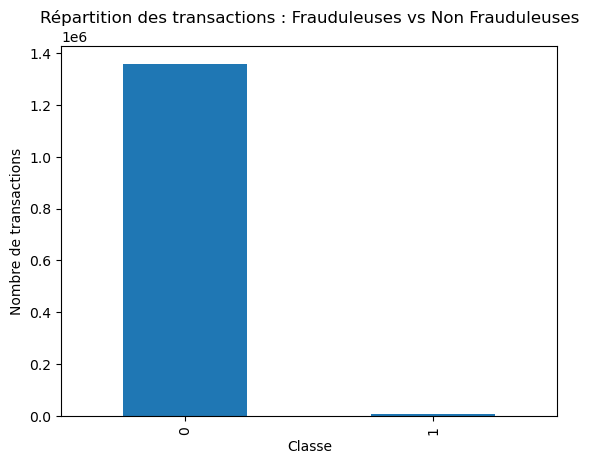

Taux de fraude dans le dataset : 0.57%


In [11]:
# Distribution des classes (fraude vs non fraude)
Data_card_complete['fraude'].value_counts().plot(kind='bar')
plt.title("R√©partition des transactions : Frauduleuses vs Non Frauduleuses")
plt.xlabel("Classe")
plt.ylabel("Nombre de transactions")
plt.show()

# Affichage du pourcentage de transactions frauduleuses
fraud_ratio = Data_card_complete['fraude'].mean() * 100
print(f"Taux de fraude dans le dataset : {fraud_ratio:.2f}%")

 ### $Commentaire$

Le taux global de fraude observ√© dans le jeu de donn√©es est particuli√®rement faible, avoisinant 0,57 %. Cette faible proportion traduit une forte pr√©dominance des transactions l√©gitimes, ce qui est g√©n√©ralement le cas dans les syst√®mes de paiement r√©els o√π les fraudes repr√©sentent une minorit√© marginale des op√©rations totales.

Cependant, cette d√©s√©quilibre marqu√© entre classes (transactions frauduleuses vs non frauduleuses) constitue un d√©fi majeur pour la mod√©lisation : les algorithmes d‚Äôapprentissage risquent de favoriser la classe majoritaire, en n√©gligeant les cas rares mais cruciaux de fraude.

**Ainsi, il sera n√©cessaire d‚Äôadopter des strat√©gies sp√©cifiques de gestion du d√©s√©quilibre des classes, telles que** :

- la r√©√©chantillonnage (oversampling ou undersampling),
- l‚Äôutilisation de poids de classes ajust√©s,
- ou encore le recours √† des mod√®les robustes face aux donn√©es d√©s√©quilibr√©es.

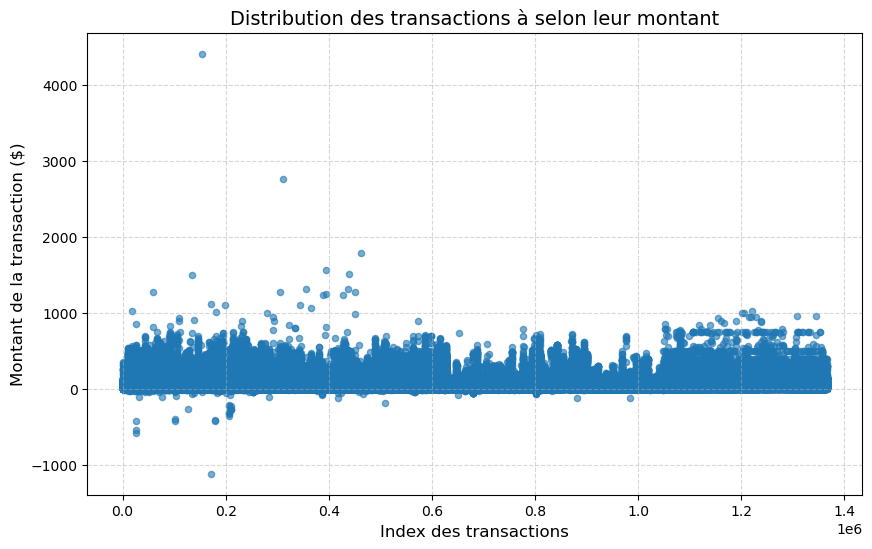

count        mean         std      min      25%     50%     75%      max
fraude                                                                              
0       1359055.0   53.640954   42.268213 -1116.91   31.420   46.01   64.59  4413.61
1          7762.0  172.561364  116.865552     0.03  124.485  150.00  200.00  1020.49

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(
    x=Data_card_complete.index, 
    y=Data_card_complete['dollar_amt'], 
    alpha=0.6, 
    s=20
)

# Mise en forme du graphique
plt.title("Distribution des transactions √† selon leur montant", fontsize=14)
plt.xlabel("Index des transactions", fontsize=12)
plt.ylabel("Montant de la transaction ($)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Comparaison des montants frauduleux vs non frauduleux
Data_card_complete.groupby('fraude')['dollar_amt'].describe()

 ### $Commentaire$

- La grande majorit√© des transactions se concentrent dans une bande dense autour de z√©ro, ce qui indique que la plupart des op√©rations ont des montants relativement faibles, probablement inf√©rieurs √† quelques centaines de dollars. Cette zone compacte traduit la normalit√© des comportements financiers courants.

- Cependant, on observe la pr√©sence de plusieurs points isol√©s, s‚Äô√©levant au-dessus ou en dessous du nuage principal. Ces points repr√©sentent des valeurs extr√™mes ou atypiques, aussi bien pour des montants √©lev√©s positifs (au-del√† de 2 000 √† 4 000 dollars) que pour quelques valeurs n√©gatives (avoisinant -1 000 dollars).

In [13]:
# Aper√ßu g√©n√©ral des donn√©es
Data_card_complete.info()

# Aper√ßu statistique des variables num√©riques
Data_card_complete['dollar_amt'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366817 entries, 0 to 1366816
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SEQ                     1366817 non-null  int64  
 1   Trans_Calendar_Date     1366817 non-null  object 
 2   Local_Transaction_Time  1366817 non-null  object 
 3   CD_TYPE                 1366817 non-null  object 
 4   dollar_amt              1366817 non-null  float64
 5   CASE_ID                 1362740 non-null  float64
 6   fraude                  1366817 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 73.0+ MB


count    1.366817e+06
mean     5.431629e+01
std      4.397568e+01
min     -1.116910e+03
25%      3.150000e+01
50%      4.618000e+01
75%      6.500000e+01
max      4.413610e+03
Name: dollar_amt, dtype: float64

 ### $Commentaire$

- **Valeurs manquantes**

Le jeu de donn√©es pr√©sente une excellente compl√©tude globale, avec un taux de valeurs manquantes quasi nul. Les rares valeurs manquantes observ√©es concernent exclusivement la colonne `CASE_ID`, qui sert d‚Äôidentifiant unique pour les cartes de cr√©dit.
Ces absences peuvent √™tre dues √† des anomalies lors de la collecte ou √† des transactions isol√©es n‚Äôayant pas pu √™tre reli√©es √† une carte sp√©cifique. Bien que leur proportion soit n√©gligeable, elles n√©cessitent une v√©rification, car la pr√©sence d‚Äôun identifiant manquant emp√™che d‚Äôassocier correctement les transactions √† un titulaire de carte. Selon l‚Äôampleur du ph√©nom√®ne, ces enregistrements pourront √™tre supprim√©s ou imput√©s de mani√®re coh√©rente avant l‚Äô√©tape de mod√©lisation.

- **Montants n√©gatifs**

L‚Äôanalyse descriptive du champ `dollar_amt` r√©v√®le un montant minimal de -1 116,91 dollars, indiquant la pr√©sence de valeurs n√©gatives dans le jeu de donn√©es.
Ces montants n√©gatifs peuvent correspondre √† des transactions de remboursement, d‚Äôajustement de solde ou d‚Äôannulation d‚Äôachat, courantes dans le traitement des op√©rations financi√®res.
Toutefois, comme le contexte d‚Äô√©tude se limite √† la d√©tection de fraudes sur les paiements sortants, ces valeurs pourraient √™tre consid√©r√©es comme non pertinentes et donc exclues. Une exploration plus approfondie permettra de d√©terminer s‚Äôil s‚Äôagit de comportements l√©gitimes ou d‚Äôerreurs de saisie.

In [14]:
# V√©rifier les valeurs n√©gatives dans la colonne dollar_amt
negatives = Data_card_complete[Data_card_complete['dollar_amt'] < 0]
print(f"Nombre de transactions √† montant n√©gatif : {len(negatives)}")
negatives.head()

Nombre de transactions √† montant n√©gatif : 5795


SEQ Trans_Calendar_Date Local_Transaction_Time CD_TYPE  dollar_amt  CASE_ID  fraude
702   36           10-Jul-18               10:29:44     GDC       -2.36     17.0       0
704   34           12-Jul-18               11:01:27     GDC       -2.20     17.0       0
707   31           14-Jul-18               11:24:10     GDC       -1.24     17.0       0
709   29           14-Jul-18               19:38:43     GDC       -2.18     17.0       0
712   26           17-Jul-18               12:36:07     GDC       -2.16     17.0       0

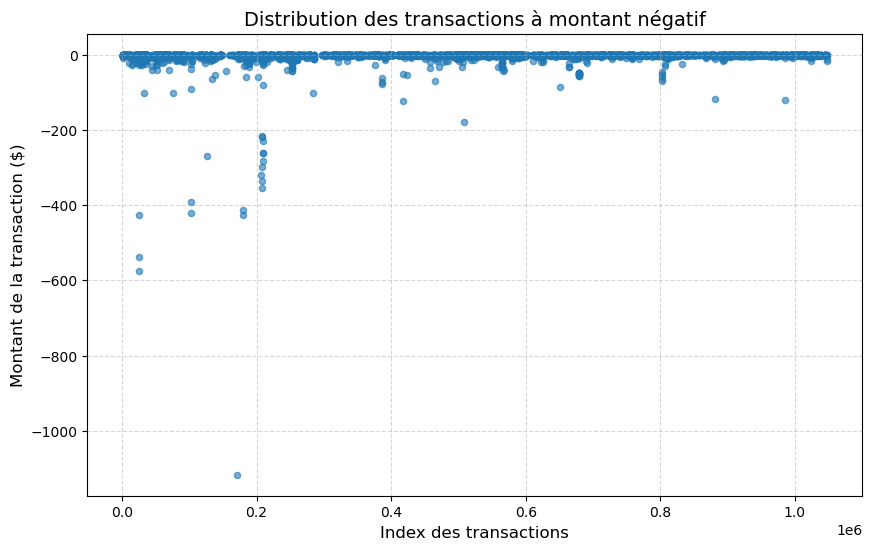

In [15]:
# Cr√©ation du graphique
plt.figure(figsize=(10,6))
plt.scatter(
    x=negatives.index, 
    y=negatives['dollar_amt'], 
    alpha=0.6, 
    s=20
)

# Mise en forme du graphique
plt.title("Distribution des transactions √† montant n√©gatif", fontsize=14)
plt.xlabel("Index des transactions", fontsize=12)
plt.ylabel("Montant de la transaction ($)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

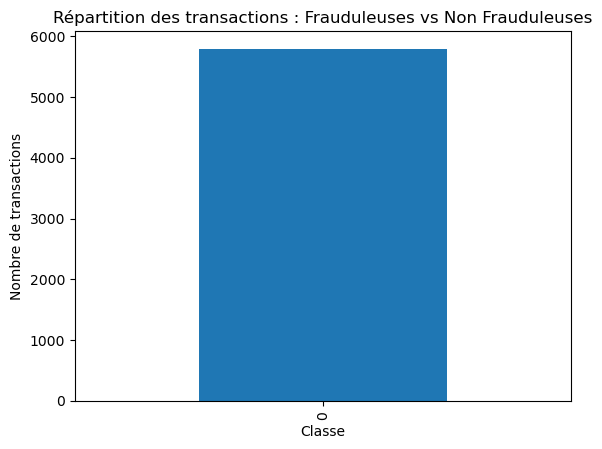

Taux de fraude dans les transactions √† montant n√©gatif : 0.00%


In [16]:
# Distribution des classes (fraude vs non fraude)
negatives['fraude'].value_counts().plot(kind='bar')
plt.title("R√©partition des transactions : Frauduleuses vs Non Frauduleuses")
plt.xlabel("Classe")
plt.ylabel("Nombre de transactions")
plt.show()

# Affichage du pourcentage de transactions frauduleuses
fraud_ratio = negatives['fraude'].mean() * 100
print(f"Taux de fraude dans les transactions √† montant n√©gatif : {fraud_ratio:.2f}%")

 ### $Commentaire$

La majorit√© des valeurs n√©gatives observ√©es se situent tr√®s pr√®s de z√©ro, √† l‚Äôexception de quelques montants isol√©s pr√©sentant un √©cart plus marqu√©.

√âtant donn√© que le pr√©sent projet porte sur la d√©tection de fraudes, et que les transactions √† montants n√©gatifs correspondent g√©n√©ralement √† des remboursements ou des annulations d‚Äôop√©rations, il est peu probable qu‚Äôelles soient pertinentes dans ce contexte d‚Äôanalyse.

Par ailleurs, aucune de ces transactions n‚Äôa √©t√© identifi√©e comme frauduleuse, ce qui renforce l‚Äôid√©e qu‚Äôelles peuvent √™tre exclues sans incidence sur la qualit√© du mod√®le

In [16]:
# Nombre et pourcentage de transactions sans identifiant de carte
no_id = Data_card_complete[Data_card_complete['CASE_ID'].isnull()]
nb_missing_caseid = len(no_id)
pct_missing_caseid = (nb_missing_caseid / len(Data_card_complete)) * 100

print(f"\nNombre de transactions sans ID : {nb_missing_caseid}")
print(f"Pourcentage de transactions sans ID : {pct_missing_caseid:.3f}%")


Nombre de transactions sans ID : 4077
Pourcentage de transactions sans ID : 0.298%


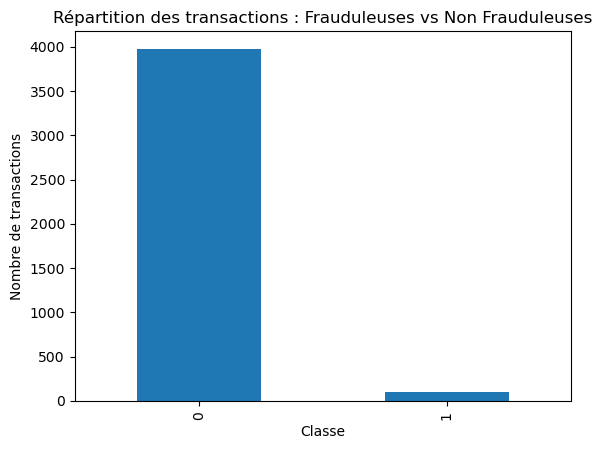

Taux de fraude des transactions non-identifi√©es : 2.48%


In [17]:
# Distribution des classes (fraude vs non fraude)
no_id['fraude'].value_counts().plot(kind='bar')
plt.title("R√©partition des transactions : Frauduleuses vs Non Frauduleuses")
plt.xlabel("Classe")
plt.ylabel("Nombre de transactions")
plt.show()

# Affichage du pourcentage de transactions frauduleuses
fraud_ratio = no_id['fraude'].mean() * 100
print(f"Taux de fraude des transactions non-identifi√©es : {fraud_ratio:.2f}%")

### $Commentaire$
Les transactions non identifi√©es repr√©sentent environ 0,3 % de l‚Äôensemble du jeu de donn√©es, soit 4 077 cas. Bien que leur proportion soit marginale, leur pr√©sence m√©rite une attention particuli√®re, car elles traduisent une absence d‚Äôinformation cl√© (CASE_ID) susceptible de compliquer le suivi ou la tra√ßabilit√© des op√©rations.

Par ailleurs, 2,48 % de ces transactions anonymes sont signal√©es comme frauduleuses, un taux nettement sup√©rieur √† la moyenne globale de 0,57 %. Cette surrepr√©sentation laisse penser que l‚Äôanonymat pourrait constituer un facteur de risque accru de fraude, ou du moins un indicateur d‚Äôirr√©gularit√© dans la collecte ou la saisie des donn√©es.

Il serait donc pertinent d‚Äôapprofondir l‚Äôanalyse de ces cas afin de d√©terminer s‚Äôils r√©sultent d‚Äôun d√©faut technique de saisie, d‚Äôun masquage volontaire, ou d‚Äôune tentative de dissimulation d‚Äôactivit√© frauduleuse.

## Analyser la distribution des valeurs des transactions et l‚Äôheure de chaque transaction pour les situations normales et frauduleuses

In [18]:
# Copie du dataframe pour √©viter de modifier l'original
df = Data_card_complete.copy()

In [19]:
# Conversion de la colonne d'heure en format datetime
df['Local_Transaction_Time'] = pd.to_datetime(df['Local_Transaction_Time'], format='%H:%M:%S', errors='coerce')
# Extraire l'heure sous forme num√©rique (0 √† 23)
df['hour'] = df['Local_Transaction_Time'].dt.hour

# V√©rification rapide
print(df[['dollar_amt', 'hour', 'fraude']].head())

   dollar_amt  hour  fraude
0       44.20    15       0
1       57.78    11       0
2       37.30    13       0
3       88.32    13       0
4       46.74    18       0


# Distribution horaire des transactions

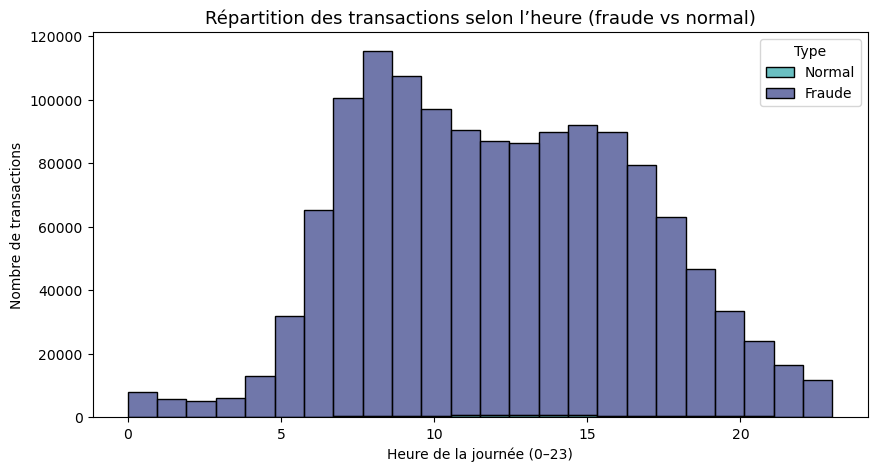

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='hour', hue='fraude', bins=24, multiple='stack', palette='mako')
plt.title("R√©partition des transactions selon l‚Äôheure (fraude vs normal)", fontsize=13)
plt.xlabel("Heure de la journ√©e (0‚Äì23)")
plt.ylabel("Nombre de transactions")
plt.legend(title='Type', labels=['Normal', 'Fraude'])
plt.show()

# Commentaire
les transactions frauduleuses sont quasiment invisibles sur le graphique.
Cela est d√ª √† un d√©s√©quilibre massif des classes : √† peine 0.57 % de fraudes sur l‚Äôensemble du dataset. Du coup, nous aloons afficher chaque distribution separement.

# Distribution horaire des transactions FRAUDULEUSES 

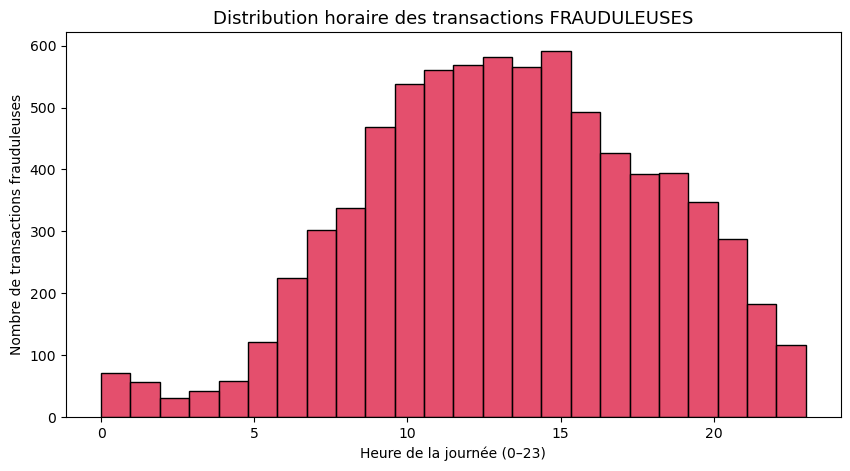


üìà Nombre de fraudes par heure de la journ√©e :
hour
0      72
1      57
2      31
3      43
4      59
5     122
6     224
7     302
8     338
9     468
10    538
11    561
12    568
13    581
14    566
15    592
16    493
17    427
18    393
19    394
20    347
21    287
22    183
23    116
Name: count, dtype: int64


In [21]:
# Distribution horaire des transactions FRAUDULEUSES uniquement

fraudes = df[df['fraude'] == 1].copy()

plt.figure(figsize=(10,5))
sns.histplot(data=fraudes, x='hour', bins=24, color='crimson', kde=False)
plt.title("Distribution horaire des transactions FRAUDULEUSES", fontsize=13)
plt.xlabel("Heure de la journ√©e (0‚Äì23)")
plt.ylabel("Nombre de transactions frauduleuses")
plt.show()

# Statistiques par heure
fraude_hourly = fraudes['hour'].value_counts().sort_index()
print("\nüìà Nombre de fraudes par heure de la journ√©e :")
print(fraude_hourly)


# Commentaire
#### Interpr√©tation comportementale

1. Pas d‚Äôanomalie temporelle flagrante
Les fraudes ne se concentrent pas sp√©cifiquement la nuit ou √† des heures inhabituelles.
Cela sugg√®re que les fraudeurs cherchent √† imiter le comportement normal des utilisateurs pour passer inaper√ßus.

2. Corr√©lation avec le volume d‚Äôactivit√©
Le nombre de fraudes augmente naturellement aux heures o√π le volume total de transactions est √©lev√©.
Ce qui est logique : plus de transactions donc plus d‚Äôopportunit√©s pour les fraudes.

3. L‚Äôheure n‚Äôest pas discriminante seule
La variable hour est donc informative, mais pas discriminante √† elle seule.

# Distribution des montants frauduleux

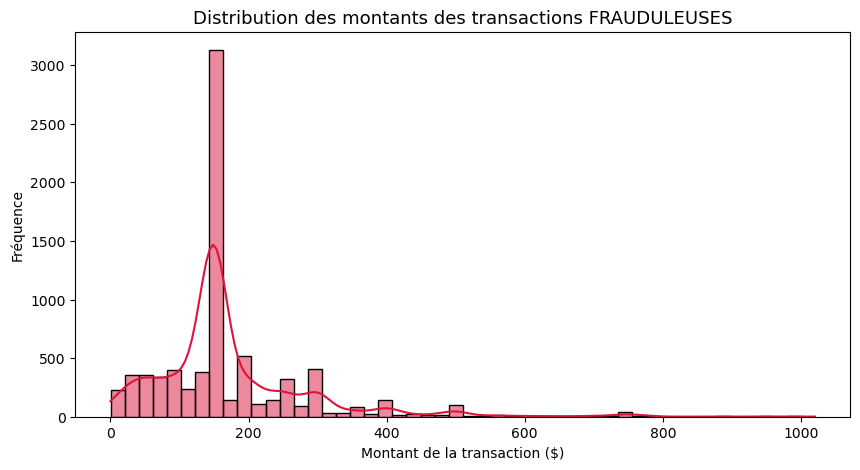

Statistiques sur les montants frauduleux :
count    7762.000000
mean      172.561364
std       116.865552
min         0.030000
25%       124.485000
50%       150.000000
75%       200.000000
max      1020.490000
Name: dollar_amt, dtype: float64


In [22]:
# Filtrer uniquement les transactions frauduleuses
fraudes = df[df['fraude'] == 1]

plt.figure(figsize=(10,5))
sns.histplot(fraudes['dollar_amt'], bins=50, kde=True, color='crimson')
plt.title("Distribution des montants des transactions FRAUDULEUSES", fontsize=13)
plt.xlabel("Montant de la transaction ($)")
plt.ylabel("Fr√©quence")
plt.show()

# Statistiques descriptives
print("Statistiques sur les montants frauduleux :")
print(fraudes['dollar_amt'].describe())

In [23]:
fraude_Montant = fraudes['dollar_amt'].value_counts().sort_index()
print("\nüìà Frequence Montant :")
print(fraude_Montant)


üìà Frequence Montant :
dollar_amt
0.03       3
0.04       4
0.05       3
0.06       2
0.10       1
          ..
954.28     1
954.35     1
996.70     1
999.00     1
1020.49    1
Name: count, Length: 3434, dtype: int64


# Top_5 montants les plus fr√©quents parmi les fraudes

Les 5 montants les plus fr√©quents dans les transactions frauduleuses :
dollar_amt
150.0    1903
200.0     272
300.0     205
149.0     175
250.0     142
Name: count, dtype: int64


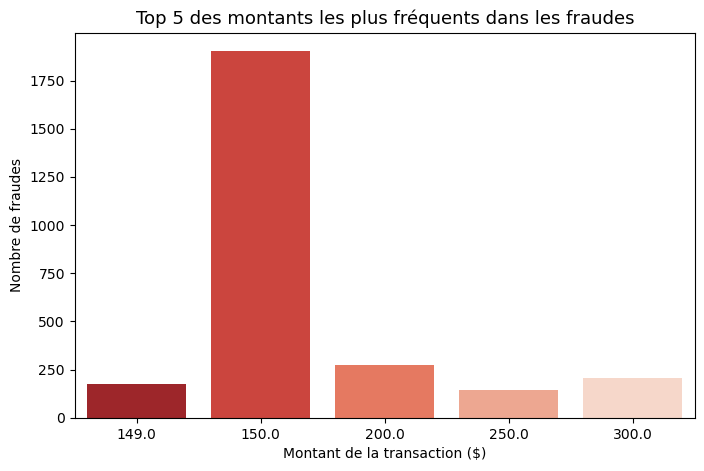

In [24]:
# 5 montants les plus fr√©quents dans les transactions frauduleuses
top_5_montants = fraudes['dollar_amt'].value_counts().head(5)

print("Les 5 montants les plus fr√©quents dans les transactions frauduleuses :")
print(top_5_montants)

# Visualisation
plt.figure(figsize=(8,5))
sns.barplot(x=top_5_montants.index, y=top_5_montants.values, palette="Reds_r")
plt.title("Top 5 des montants les plus fr√©quents dans les fraudes", fontsize=13)
plt.xlabel("Montant de la transaction ($)")
plt.ylabel("Nombre de fraudes")
plt.show()

# Commentaire 
L‚Äôexamen des montants les plus fr√©quents dans les transactions frauduleuses r√©v√®le une forte concentration autour de montants ronds et moyens, principalement √† 150 $, 200 $ et 300 $.

Le montant de 150 $, √† lui seul, repr√©sente pr√®s d‚Äôun quart de l‚Äôensemble des fraudes recens√©es (1 903 cas sur 7 762).

Cette r√©currence indique une strat√©gie comportementale d√©lib√©r√©e des fraudeurs :
ils privil√©gient des montants suffisamment faibles pour ne pas √©veiller les alertes automatiques des syst√®mes bancaires, mais assez √©lev√©s pour rendre la fraude rentable √† grande √©chelle.

En revanche, les montants extr√™mes (tr√®s faibles ou sup√©rieurs √† 1 000 $) sont rares, ce qui corrobore l‚Äôid√©e que les fraudeurs cherchent √† se fondre dans le comportement normal des utilisateurs l√©gitimes.

# Comparer la distribution des montants entre transactions normales et frauduleuses

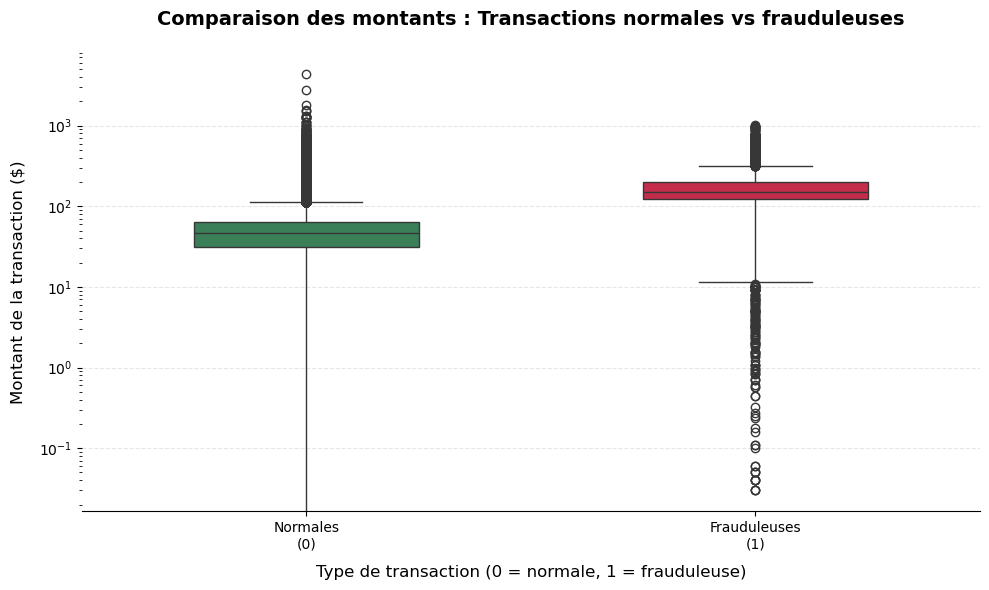

STATISTIQUES COMPARATIVES DES MONTANTS DE TRANSACTIONS

Statistiques descriptives :
            count        mean         std      min      25%     50%     75%      max
fraude                                                                              
0       1359055.0   53.640954   42.268213 -1116.91   31.420   46.01   64.59  4413.61
1          7762.0  172.561364  116.865552     0.03  124.485  150.00  200.00  1020.49

STATISTIQUES COMPL√âMENTAIRES

--- Transactions Normales ---
Nombre: 1,359,055
M√©diane: $46.01
Moyenne: $53.64
√âcart-type: $42.27
Min: $-1116.91
Max: $4413.61
Q1 (25%): $31.42
Q3 (75%): $64.59

--- Transactions Frauduleuses ---
Nombre: 7,762
M√©diane: $150.00
Moyenne: $172.56
√âcart-type: $116.87
Min: $0.03
Max: $1020.49
Q1 (25%): $124.48
Q3 (75%): $200.00

R√âPARTITION DES TRANSACTIONS
Total transactions: 1,366,817
Transactions normales: 1,359,055 (99.43%)
Transactions frauduleuses: 7,762 (0.57%)


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))

# Cr√©ation du boxplot avec des couleurs plus distinctes
boxplot = sns.boxplot(x='fraude', y='dollar_amt', data=Data_card_complete, 
                     palette=['#2E8B57', '#DC143C'],  # Vert pour normale, rouge pour fraude
                     width=0.5)

plt.title("Comparaison des montants : Transactions normales vs frauduleuses", 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel("Type de transaction (0 = normale, 1 = frauduleuse)", fontsize=12, labelpad=10)
plt.ylabel("Montant de la transaction ($)", fontsize=12, labelpad=10)
plt.yscale('log')  # √âchelle logarithmique

# Ajouter des √©tiquettes plus explicites sur l'axe x
plt.xticks([0, 1], ['Normales\n(0)', 'Frauduleuses\n(1)'])

# Ajouter une grille pour meilleure lisibilit√©
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Am√©liorer l'apparence g√©n√©rale
sns.despine(left=True)
plt.tight_layout()

# Afficher le graphique
plt.show()

# Statistiques comparatives d√©taill√©es
print("=" * 60)
print("STATISTIQUES COMPARATIVES DES MONTANTS DE TRANSACTIONS")
print("=" * 60)

stats = Data_card_complete.groupby('fraude')['dollar_amt'].describe()
print("\nStatistiques descriptives :")
print(stats)

# Statistiques suppl√©mentaires
print("\n" + "=" * 40)
print("STATISTIQUES COMPL√âMENTAIRES")
print("=" * 40)

for fraude_type in [0, 1]:
    subset = Data_card_complete[Data_card_complete['fraude'] == fraude_type]['dollar_amt']
    type_name = "Normales" if fraude_type == 0 else "Frauduleuses"
    
    print(f"\n--- Transactions {type_name} ---")
    print(f"Nombre: {len(subset):,}")
    print(f"M√©diane: ${subset.median():.2f}")
    print(f"Moyenne: ${subset.mean():.2f}")
    print(f"√âcart-type: ${subset.std():.2f}")
    print(f"Min: ${subset.min():.2f}")
    print(f"Max: ${subset.max():.2f}")
    print(f"Q1 (25%): ${subset.quantile(0.25):.2f}")
    print(f"Q3 (75%): ${subset.quantile(0.75):.2f}")

# Ratio frauduleuses/normales
fraud_count = len(Data_card_complete[Data_card_complete['fraude'] == 1])
normal_count = len(Data_card_complete[Data_card_complete['fraude'] == 0])
total_count = len(Data_card_complete)

print("\n" + "=" * 40)
print("R√âPARTITION DES TRANSACTIONS")
print("=" * 40)
print(f"Total transactions: {total_count:,}")
print(f"Transactions normales: {normal_count:,} ({normal_count/total_count*100:.2f}%)")
print(f"Transactions frauduleuses: {fraud_count:,} ({fraud_count/total_count*100:.2f}%)")

# Commentaire
es transactions frauduleuses se distinguent nettement par des montants plus √©lev√©s et une plus grande variabilit√©. 

La m√©diane des fraudes (~$150)  est environ 3 fois sup√©rieure √† celle des transactions normales (~$46). La distribution des fraudes est plus √©tendue, surtout au-del√† de $125. Sur l‚Äô√©chelle logarithmique, l‚Äô√©cart entre les deux groupes est encore plus visible.

Insight cl√© : le montant est un excellent indicateur pr√©liminaire de fraude ‚Äî toute transaction >$100 doit √™tre surveill√©e, avec des seuils d‚Äôalerte √† $125 (risque) et $200 (fort risque).

### Analyse de la distribution des montants et calcule des pourcentages de transactions au-dessus de $200

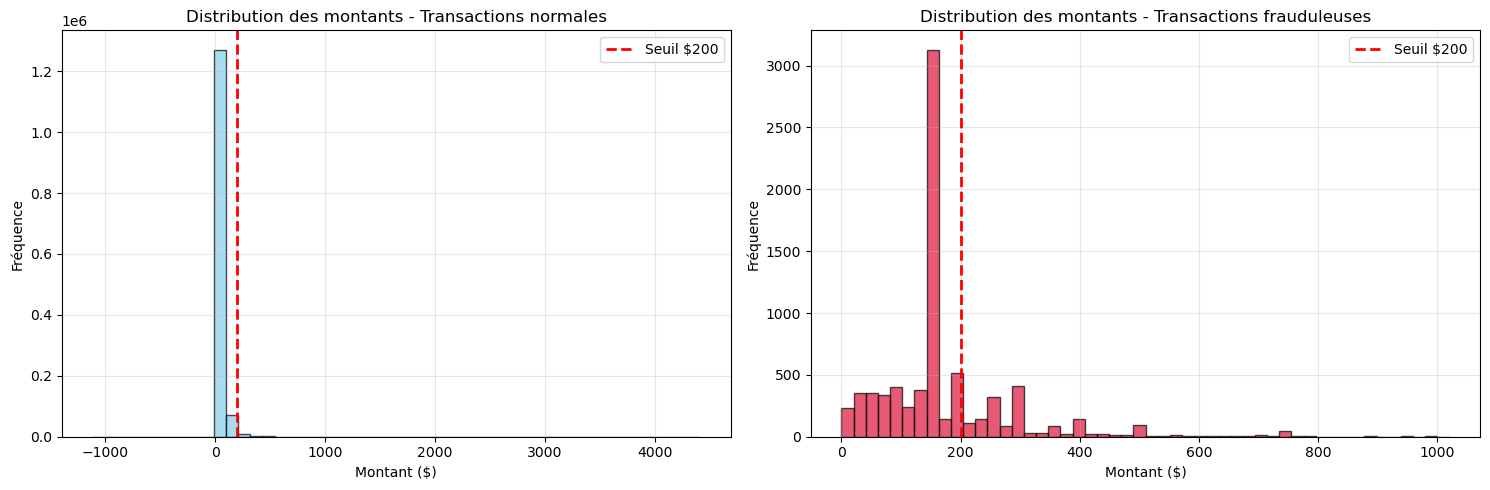

ANALYSE DES TRANSACTIONS > $200
Transactions normales > $200: 17,252 / 1,359,055 = 1.2694%
Transactions frauduleuses > $200: 1,740 / 7,762 = 22.42%

Ratio de risque: 17.7x plus de chances qu'une transaction > $200 soit frauduleuse


In [46]:
# Analyse de la distribution des montants par type de transaction
plt.figure(figsize=(15, 5))

# Graphique 1: Distribution des transactions normales
plt.subplot(1, 2, 1)
data_normales = Data_card_complete[Data_card_complete['fraude'] == 0]['dollar_amt']
plt.hist(data_normales, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=200, color='red', linestyle='--', linewidth=2, label='Seuil $200')
plt.title('Distribution des montants - Transactions normales')
plt.xlabel('Montant ($)')
plt.ylabel('Fr√©quence')
plt.legend()
plt.grid(alpha=0.3)

# Graphique 2: Distribution des transactions frauduleuses
plt.subplot(1, 2, 2)
data_fraudes = Data_card_complete[Data_card_complete['fraude'] == 1]['dollar_amt']
plt.hist(data_fraudes, bins=50, color='crimson', edgecolor='black', alpha=0.7)
plt.axvline(x=200, color='red', linestyle='--', linewidth=2, label='Seuil $200')
plt.title('Distribution des montants - Transactions frauduleuses')
plt.xlabel('Montant ($)')
plt.ylabel('Fr√©quence')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Calcul des pourcentages de transactions > $200
print("ANALYSE DES TRANSACTIONS > $200")
print("=" * 50)

# Transactions normales
normales_total = len(data_normales)
normales_sup200 = len(data_normales[data_normales > 200])
pourcentage_normales_sup200 = (normales_sup200 / normales_total) * 100

# Transactions frauduleuses
fraudes_total = len(data_fraudes)
fraudes_sup200 = len(data_fraudes[data_fraudes > 200])
pourcentage_fraudes_sup200 = (fraudes_sup200 / fraudes_total) * 100

print(f"Transactions normales > $200: {normales_sup200:,} / {normales_total:,} = {pourcentage_normales_sup200:.4f}%")
print(f"Transactions frauduleuses > $200: {fraudes_sup200:,} / {fraudes_total:,} = {pourcentage_fraudes_sup200:.2f}%")

# Ratio de risque
ratio_risque = pourcentage_fraudes_sup200 / pourcentage_normales_sup200 if pourcentage_normales_sup200 > 0 else float('inf')
print(f"\nRatio de risque: {ratio_risque:.1f}x plus de chances qu'une transaction > $200 soit frauduleuse")



# Analyse par segments de montants

In [47]:
print("\n" + "=" * 50)
print("R√âPARTITION PAR SEGMENTS DE MONTANTS")
print("=" * 50)

def analyser_segment(montant_min, montant_max, nom_segment):
    normales_segment = len(data_normales[(data_normales >= montant_min) & (data_normales <= montant_max)])
    fraudes_segment = len(data_fraudes[(data_fraudes >= montant_min) & (data_fraudes <= montant_max)])
    
    pourcentage_normales = (normales_segment / normales_total) * 100
    pourcentage_fraudes = (fraudes_segment / fraudes_total) * 100
    
    print(f"\n{nom_segment} (${montant_min}-${montant_max}):")
    print(f"  Normales: {normales_segment:,} ({pourcentage_normales:.2f}%)")
    print(f"  Frauduleuses: {fraudes_segment:,} ({pourcentage_fraudes:.2f}%)")
    
    if normales_segment > 0:
        taux_fraude = (fraudes_segment / (normales_segment + fraudes_segment)) * 100
        print(f"  Taux de fraude dans le segment: {taux_fraude:.2f}%")

# Analyse des diff√©rents segments
analyser_segment(0, 100, "Faible montant")
analyser_segment(100, 200, "Montant moyen")
analyser_segment(200, 500, "Montant √©lev√©")
analyser_segment(500, 1000, "Montant tr√®s √©lev√©")
analyser_segment(1000, 5000, "Montant exceptionnel")


R√âPARTITION PAR SEGMENTS DE MONTANTS

Faible montant ($0-$100):
  Normales: 1,267,674 (93.28%)
  Frauduleuses: 1,642 (21.15%)
  Taux de fraude dans le segment: 0.13%

Montant moyen ($100-$200):
  Normales: 70,570 (5.19%)
  Frauduleuses: 4,518 (58.21%)
  Taux de fraude dans le segment: 6.02%

Montant √©lev√© ($200-$500):
  Normales: 17,065 (1.26%)
  Frauduleuses: 1,869 (24.08%)
  Taux de fraude dans le segment: 9.87%

Montant tr√®s √©lev√© ($500-$1000):
  Normales: 895 (0.07%)
  Frauduleuses: 189 (2.43%)
  Taux de fraude dans le segment: 17.44%

Montant exceptionnel ($1000-$5000):
  Normales: 20 (0.00%)
  Frauduleuses: 1 (0.01%)
  Taux de fraude dans le segment: 4.76%


# Commentaire
Les r√©sultats confirment pleinement les hypoth√®ses initiales : le montant est un indicateur majeur de fraude.
Les transactions > $200 pr√©sentent un risque 17,7x plus √©lev√©, et au-del√† de $500, le taux de fraude atteint 17,4% ‚Äî un signal d‚Äôalerte fort.

Gradient de risque marqu√© :

$0‚Äì$100 ‚Üí risque faible (r√©f√©rence)

$100‚Äì$200 ‚Üí 46x plus risqu√© (zone critique, 58% des fraudes)

$200‚Äì$500 ‚Üí 76x plus risqu√©

$500‚Äì$1000 ‚Üí 134x plus risqu√© (pic de fraude)

### Features :

Surveillance prioritaire sur la tranche $100‚Äì$200 (fort volume et risque √©lev√©)

Validation renforc√©e pour toute transaction > $200

Exploiter ce gradient de risque dans les mod√®les de d√©tection (feature cl√© √† pond√©rer fortement).

# Analyse de la S√©quence des transactions

#### Note
La variable SEQ (s√©quence des transactions) repr√©sente l'ordre chronologique inverse des op√©rations par carte, o√π :

SEQ = 41 : Transaction la plus ancienne

SEQ = 1 : Transaction la plus r√©cente

Importance strat√©gique pour la d√©tection de fraude
1. Contexte comportemental :
- Chaque carte poss√®de 41 transactions s√©quentielles
- La position dans la s√©quence r√©v√®le des patterns temporels
- Permet d'identifier les changements soudains de comportement

2. Valeur pr√©dictive potentielle :

- Les transactions frauduleuses suivent-elles une position sp√©cifique ?
- Existe-t-il des patterns de fr√©quence suspects ?
- La fraude survient-elle apr√®s des p√©riodes d'inactivit√© ?

R√©sultats attendus
Identifier si la position s√©quentielle des transactions constitue un indicateur fiable de comportement frauduleux.

### Analyse de la distribution des fraudes par position SEQ

In [26]:
# Distribution globale des fraudes par position SEQ
fraude_par_seq = df.groupby('SEQ')['fraude'].agg(['count', 'sum', 'mean']).reset_index()
fraude_par_seq.columns = ['SEQ', 'total_transactions', 'nb_fraudes', 'taux_fraude']
fraude_par_seq['pourcentage_fraude'] = fraude_par_seq['taux_fraude'] * 100

print("üìä DISTRIBUTION DES FRAUDES PAR POSITION SEQ :")
print(fraude_par_seq.round(4))

üìä DISTRIBUTION DES FRAUDES PAR POSITION SEQ :
    SEQ  total_transactions  nb_fraudes  taux_fraude  pourcentage_fraude
0     1               33337        7753       0.2326             23.2564
1     2               33337           9       0.0003              0.0270
2     3               33337           0       0.0000              0.0000
3     4               33337           0       0.0000              0.0000
4     5               33337           0       0.0000              0.0000
5     6               33337           0       0.0000              0.0000
6     7               33337           0       0.0000              0.0000
7     8               33337           0       0.0000              0.0000
8     9               33337           0       0.0000              0.0000
9    10               33337           0       0.0000              0.0000
10   11               33337           0       0.0000              0.0000
11   12               33337           0       0.0000              0.0000
12

# Commentaire
Les fraudes sont EXTRE√äMENT concentr√©es :

SEQ = 1 : 23.26% de fraude (7,753 fraudes sur 33,337 transactions)

SEQ = 2 : 0.03% de fraude (9 fraudes seulement)

SEQ 3-41 : 0% de fraude (Aucune fraude)

In [33]:
# √âtape 1 - R√©cup√©rer les transactions suspectes
fraudes_seq2 = df[(df['SEQ'] == 2) & (df['fraude'] == 1)]
print("√âTAPE 1 - Identification des fraudes SEQ=2")
print(f"Nombre de fraudes √† SEQ=2 : {len(fraudes_seq2)}")
print("\nD√©tails des cas :")
print(fraudes_seq2[['CASE_ID', 'SEQ', 'fraude', 'CD_TYPE', 'dollar_amt']])

√âTAPE 1 - Identification des fraudes SEQ=2
Nombre de fraudes √† SEQ=2 : 9

D√©tails des cas :
             CASE_ID  SEQ  fraude CD_TYPE  dollar_amt
1051443  176784271.0    2       1     WPC        6.49
1065137  176768654.0    2       1     WPC      149.80
1097199  176775945.0    2       1     WPC      150.00
1165013  176785044.0    2       1     WPC       12.69
1194533  176765454.0    2       1     WPC      300.00
1207202  176768593.0    2       1     WPC      150.00
1280715  176784292.0    2       1     WPC       47.00
1283175  176771112.0    2       1     WPC       50.80
1318640  176784980.0    2       1     WPC       84.76


In [35]:
# √âtape 2 - V√©rifier si SEQ=2 est bien la derni√®re transaction
print("√âTAPE 2 - V√©rification de l'ordre chronologique")

# Convertir les dates pour analyse
df['date_dt'] = pd.to_datetime(df['Trans_Calendar_Date'])

# Analyser l'ordre pour les 9 cartes suspectes
for case_id in fraudes_seq2['CASE_ID']:
    carte_data = df[df['CASE_ID'] == case_id].sort_values('date_dt')
    derniere_seq = carte_data.iloc[-1]['SEQ']
    print(f"Carte {case_id} : Derni√®re SEQ = {derniere_seq} (fraude √† SEQ=2)")
    
    if derniere_seq != 2:
        print(f"INCOH√âRENCE! La fraude n'est pas √† la derni√®re position!")

√âTAPE 2 - V√©rification de l'ordre chronologique
Carte 176784271.0 : Derni√®re SEQ = 2 (fraude √† SEQ=2)
Carte 176768654.0 : Derni√®re SEQ = 1 (fraude √† SEQ=2)
  üö® INCOH√âRENCE! La fraude n'est pas √† la derni√®re position!
Carte 176775945.0 : Derni√®re SEQ = 2 (fraude √† SEQ=2)
Carte 176785044.0 : Derni√®re SEQ = 2 (fraude √† SEQ=2)
Carte 176765454.0 : Derni√®re SEQ = 1 (fraude √† SEQ=2)
  üö® INCOH√âRENCE! La fraude n'est pas √† la derni√®re position!
Carte 176768593.0 : Derni√®re SEQ = 2 (fraude √† SEQ=2)
Carte 176784292.0 : Derni√®re SEQ = 2 (fraude √† SEQ=2)
Carte 176771112.0 : Derni√®re SEQ = 2 (fraude √† SEQ=2)
Carte 176784980.0 : Derni√®re SEQ = 2 (fraude √† SEQ=2)


In [36]:
# √âtape 3 - Focus sur les 2 cartes incoh√©rentes
print("√âTAPE 3 - Analyse des incoh√©rences d√©tect√©es")

cartes_incoherentes = [176768654.0, 176765454.0]

for case_id in cartes_incoherentes:
    carte_data = df[df['CASE_ID'] == case_id].sort_values('date_dt')
    print(f"\n--- ANALYSE D√âTAILL√âE Carte {case_id} ---")
    print("Ordre chronologique complet :")
    print(carte_data[['SEQ', 'fraude', 'dollar_amt', 'Trans_Calendar_Date', 'Local_Transaction_Time']].to_string(index=False))
    
    # Identifier o√π est la vraie fraude
    fraude_position = carte_data[carte_data['fraude'] == 1]['SEQ'].values[0]
    derniere_position = carte_data.iloc[-1]['SEQ']
    print(f"‚Üí Fraude √† SEQ = {fraude_position}")
    print(f"‚Üí Derni√®re transaction SEQ = {derniere_position}")

√âTAPE 3 - Analyse des incoh√©rences d√©tect√©es

--- ANALYSE D√âTAILL√âE Carte 176768654.0 ---
Ordre chronologique complet :
 SEQ  fraude  dollar_amt Trans_Calendar_Date Local_Transaction_Time
  41       0       18.00           24-Jul-17    1900-01-01 09:58:00
  40       0       33.44           24-Jul-17    1900-01-01 12:55:38
  39       0       37.01           25-Jul-17    1900-01-01 07:41:59
  38       0       38.88           26-Jul-17    1900-01-01 07:50:28
  37       0       27.77           26-Jul-17    1900-01-01 11:27:24
  36       0       27.01           26-Jul-17    1900-01-01 14:36:00
  35       0       40.00           27-Jul-17    1900-01-01 07:46:28
  34       0       44.00           27-Jul-17    1900-01-01 12:53:05
  32       0       40.00           28-Jul-17    1900-01-01 12:27:36
  33       0       16.00           28-Jul-17    1900-01-01 08:18:00
  31       0       46.00           31-Jul-17    1900-01-01 07:26:28
  30       0       40.02           31-Jul-17    1900-01-01

In [39]:
# √âtape 1 - Conversion des dates seulement
print("√âTAPE 1 - Conversion des dates")

# Conversion de la colonne date
df['date_dt'] = pd.to_datetime(df['Trans_Calendar_Date'], format='%d-%b-%y')

print("Dates converties")
print(f"Plage de dates : {df['date_dt'].min()} √† {df['date_dt'].max()}")
print(f"Nombre de jours couverts : {(df['date_dt'].max() - df['date_dt'].min()).days} jours")
print(f"Exemple de donn√©es :")
print(df[['CASE_ID', 'SEQ', 'date_dt', 'fraude']].head(3))

√âTAPE 1 - Conversion des dates
Dates converties
Plage de dates : 2016-01-13 00:00:00 √† 2018-08-03 00:00:00
Nombre de jours couverts : 933 jours
Exemple de donn√©es :
   CASE_ID  SEQ    date_dt  fraude
0      0.0   41 2018-03-24       0
1      0.0   40 2018-03-26       0
2      0.0   39 2018-03-27       0


### Calcul des d√©lais entre transactions

In [40]:
# √âtape 2 - Calcul des d√©lais entre transactions par carte
print("√âTAPE 2 - Calcul des p√©riodes d'inactivit√©")

# Trier par carte et date
df_sorted = df.sort_values(['CASE_ID', 'date_dt'])

# Calculer le d√©lai depuis la transaction pr√©c√©dente
df_sorted['days_since_last'] = df_sorted.groupby('CASE_ID')['date_dt'].diff().dt.days

print("D√©lais calcul√©s")
print(f"Exemple des d√©lais pour quelques cartes :")
print(df_sorted[['CASE_ID', 'SEQ', 'date_dt', 'days_since_last', 'fraude']].head(10))

√âTAPE 2 - Calcul des p√©riodes d'inactivit√©
D√©lais calcul√©s
Exemple des d√©lais pour quelques cartes :
   CASE_ID  SEQ    date_dt  days_since_last  fraude
0      0.0   41 2018-03-24              NaN       0
1      0.0   40 2018-03-26              2.0       0
2      0.0   39 2018-03-27              1.0       0
3      0.0   38 2018-04-04              8.0       0
4      0.0   37 2018-04-04              0.0       0
5      0.0   36 2018-04-13              9.0       0
6      0.0   35 2018-04-18              5.0       0
7      0.0   34 2018-04-19              1.0       0
8      0.0   33 2018-04-24              5.0       0
9      0.0   32 2018-04-26              2.0       0


### Comparaison des d√©lais avant fraude vs transactions normales

In [41]:
# √âtape 3 - Analyse des d√©lais avant transactions frauduleuses
print("√âTAPE 3 - Les fraudes suivent-elles des p√©riodes d'inactivit√© ?")

# S√©parer les d√©lais pour fraudes vs transactions normales
delais_fraudes = df_sorted[(df_sorted['fraude'] == 1) & (df_sorted['days_since_last'].notna())]['days_since_last']
delais_normales = df_sorted[(df_sorted['fraude'] == 0) & (df_sorted['days_since_last'].notna())]['days_since_last']

print(f"üìä STATISTIQUES DES D√âLAIS :")
print(f"Transactions FRAUDULEUSES :")
print(f"  ‚Ä¢ Nombre : {len(delais_fraudes)}")
print(f"  ‚Ä¢ D√©lai moyen : {delais_fraudes.mean():.1f} jours")
print(f"  ‚Ä¢ D√©lai m√©dian : {delais_fraudes.median():.1f} jours")
print(f"  ‚Ä¢ D√©lai max : {delais_fraudes.max()} jours")
print(f"\nTransactions NORMALES :")
print(f"  ‚Ä¢ Nombre : {len(delais_normales)}")
print(f"  ‚Ä¢ D√©lai moyen : {delais_normales.mean():.1f} jours")
print(f"  ‚Ä¢ D√©lai m√©dian : {delais_normales.median():.1f} jours")
print(f"  ‚Ä¢ D√©lai max : {delais_normales.max()} jours")

√âTAPE 3 - Les fraudes suivent-elles des p√©riodes d'inactivit√© ?
üìä STATISTIQUES DES D√âLAIS :
Transactions FRAUDULEUSES :
  ‚Ä¢ Nombre : 7661
  ‚Ä¢ D√©lai moyen : 3.3 jours
  ‚Ä¢ D√©lai m√©dian : 2.0 jours
  ‚Ä¢ D√©lai max : 158.0 jours

Transactions NORMALES :
  ‚Ä¢ Nombre : 1321767
  ‚Ä¢ D√©lai moyen : 3.5 jours
  ‚Ä¢ D√©lai m√©dian : 3.0 jours
  ‚Ä¢ D√©lai max : 392.0 jours


# Analyse approfondie et visualisation

In [42]:
# √âtape 4 - Analyse plus d√©taill√©e des d√©lais
print("√âTAPE 4 - Analyse d√©taill√©e des patterns de d√©lais")

# Focus sur les d√©lais courts (0-7 jours) o√π se concentre l'activit√©
delais_fraudes_courts = delais_fraudes[delais_fraudes <= 7]
delais_normales_courts = delais_normales[delais_normales <= 7]

print(f"\n FOCUS SUR D√âLAIS COURTS (0-7 jours) :")
print(f"Fraudes (0-7 jours) : {len(delais_fraudes_courts)} transactions")
print(f"  ‚Ä¢ % des fraudes totales : {len(delais_fraudes_courts)/len(delais_fraudes)*100:.1f}%")
print(f"Normales (0-7 jours) : {len(delais_normales_courts)} transactions") 
print(f"  ‚Ä¢ % des normales totales : {len(delais_normales_courts)/len(delais_normales)*100:.1f}%")

# Distribution par jour de d√©lai
print(f"\n DISTRIBUTION PAR JOUR DE D√âLAI :")
for jours in range(0, 8):
    fraudes_jour = (delais_fraudes == jours).sum()
    normales_jour = (delais_normales == jours).sum()
    print(f"  {jours} jour(s) : Fraudes={fraudes_jour}, Normales={normales_jour}")

√âTAPE 4 - Analyse d√©taill√©e des patterns de d√©lais

 FOCUS SUR D√âLAIS COURTS (0-7 jours) :
Fraudes (0-7 jours) : 7041 transactions
  ‚Ä¢ % des fraudes totales : 91.9%
Normales (0-7 jours) : 1212046 transactions
  ‚Ä¢ % des normales totales : 91.7%

 DISTRIBUTION PAR JOUR DE D√âLAI :
  0 jour(s) : Fraudes=1384, Normales=141087
  1 jour(s) : Fraudes=2140, Normales=292701
  2 jour(s) : Fraudes=1287, Normales=223207
  3 jour(s) : Fraudes=825, Normales=163744
  4 jour(s) : Fraudes=586, Normales=137309
  5 jour(s) : Fraudes=394, Normales=113133
  6 jour(s) : Fraudes=237, Normales=83254
  7 jour(s) : Fraudes=188, Normales=57611


# 4. Data Cleaning